<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# EPAT Session 1

**Executive Program in Algorithmic Trading**

**_Vectorized Backtesting_**

Prof. Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

<a href="https://home.tpq.io/certificates/pyalgo" target="_blank"><img src="https://hilpisch.com/pyalgo_cover_shadow.png" width="300px" align="left"></a>

## Basic Imports

In [1]:
# import cufflinks
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn-v0_8')
pd.set_option('mode.chained_assignment', None)
np.set_printoptions(suppress=True)
# cufflinks.set_config_file(offline=True)
%config InlineBackend.figure_format = 'svg'

## Reading Financial Data

In [2]:
url = 'https://certificate.tpq.io/findata.csv'

In [3]:
raw = pd.read_csv(url,index_col = 0,parse_dates=True).dropna()

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2518 non-null   float64
 1   MSFT.O  2518 non-null   float64
 2   INTC.O  2518 non-null   float64
 3   AMZN.O  2518 non-null   float64
 4   GS.N    2518 non-null   float64
 5   .SPX    2518 non-null   float64
 6   .VIX    2518 non-null   float64
 7   SPY     2518 non-null   float64
 8   EUR=    2518 non-null   float64
 9   XAU=    2518 non-null   float64
 10  GDX     2518 non-null   float64
 11  GLD     2518 non-null   float64
dtypes: float64(12)
memory usage: 255.7 KB


In [5]:
rn = np.random.standard_normal(len(raw))

In [7]:
raw['random'] = 100+rn.cumsum()

In [10]:
symbol = 'AAPL.O'
symbol = 'GLD'
symbol = 'random'

In [16]:
df = pd.DataFrame(raw[symbol])

<Axes: xlabel='Date'>

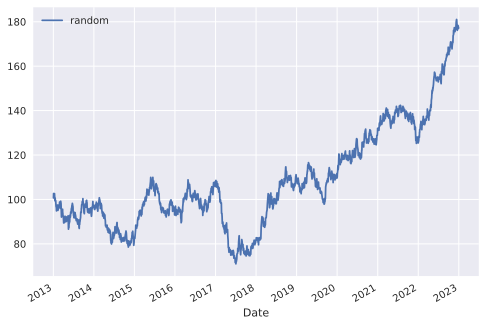

In [17]:
df.plot()

## Efficient Markets

In [18]:
lags = 5

In [20]:
cols = list()
for lag in range(1,1+lags):
    col = f'lags_{lag}'
    print(col)
    df[col] = df[symbol].shift(lag)
    cols.append(col)
    

lags_1
lags_2
lags_3
lags_4
lags_5


In [22]:
df.head(8)

,random,lags_0,lags_1,lags_2,lags_3,lags_4,lags_5
Date,,,,,,,
2013-01-02,100.679075,100.679075,NaN,NaN,NaN,NaN,NaN
2013-01-03,102.663312,102.663312,100.679075,NaN,NaN,NaN,NaN
2013-01-04,102.260690,102.260690,102.663312,100.679075,NaN,NaN,NaN
2013-01-07,102.129924,102.129924,102.260690,102.663312,100.679075,NaN,NaN
2013-01-08,101.983065,101.983065,102.129924,102.260690,102.663312,100.679075,NaN
2013-01-09,101.648818,101.648818,101.983065,102.129924,102.260690,102.663312,100.679075
2013-01-10,102.567475,102.567475,101.648818,101.983065,102.129924,102.260690,102.663312
2013-01-11,102.627020,102.627020,102.567475,101.648818,101.983065,102.129924,102.260690


In [27]:
# Drop all the NaNs
#df.dropna(inplace=True)
df.head(10)


,random,lags_0,lags_1,lags_2,lags_3,lags_4,lags_5
Date,,,,,,,
2013-01-09,101.648818,101.648818,101.983065,102.129924,102.260690,102.663312,100.679075
2013-01-10,102.567475,102.567475,101.648818,101.983065,102.129924,102.260690,102.663312
2013-01-11,102.627020,102.627020,102.567475,101.648818,101.983065,102.129924,102.260690
2013-01-14,100.482061,100.482061,102.627020,102.567475,101.648818,101.983065,102.129924
2013-01-15,99.422210,99.422210,100.482061,102.627020,102.567475,101.648818,101.983065
2013-01-16,99.668545,99.668545,99.422210,100.482061,102.627020,102.567475,101.648818
2013-01-17,100.652611,100.652611,99.668545,99.422210,100.482061,102.627020,102.567475
2013-01-18,99.645445,99.645445,100.652611,99.668545,99.422210,100.482061,102.627020
2013-01-22,99.464997,99.464997,99.645445,100.652611,99.668545,99.422210,100.482061


In [28]:
reg = np.linalg.lstsq(df[cols],df[symbol],rcond=False)[0] # Extract the 1st element. Returns the least-squares solution to a linear matrix equation
reg

array([ 1.00958505,  0.010563  ,  0.00313648, -0.04263896,  0.01964553])

<BarContainer object of 5 artists>

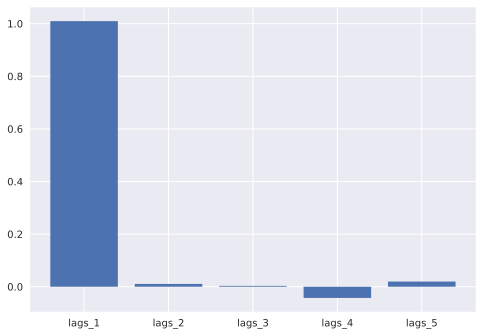

In [30]:
plt.bar(cols,reg)

In [31]:
df[cols].corr() # Price data are perfectly correlated

,lags_1,lags_2,lags_3,lags_4,lags_5
lags_1,1.000000,0.999086,0.998154,0.997184,0.996170
lags_2,0.999086,1.000000,0.999083,0.998147,0.997174
lags_3,0.998154,0.999083,1.000000,0.999080,0.998140
lags_4,0.997184,0.998147,0.999080,1.000000,0.999075
lags_5,0.996170,0.997174,0.998140,0.999075,1.000000


## OLS Regression Based Trading Strategy

We want to use **historical returns** to predict the **direction of next days market movement** (i.e. the sign of next days return, and not the absolute size).

## Vectorized Backtesting

In trading, it is important to get the **large movements** (in absolute terms) correct.

The following backtesting is done under a number of simplifying assumptions, such as zero transaction costs, zero margins for short positions.

REMARK: simplifying assumptions are, among others, in-sample testing, no margin for short positions, no transaction costs

### Train-Test Split

In [ ]:
# !pip install quantstats

In [ ]:
# import quantstats as qs

In [ ]:
# qs.reports.metrics(test['s'], benchmark=test['r'])

In [ ]:
# qs.reports.basic(test['s'], benchmark=test['r'])

## Vectorized Backtesting (OOP Way)

### `FinancialData` Class

### Vectorized Backtesting Class

The following class implements the backtest based on an "in-sample" approach (no train-test split).

**EXERCISE**: Re-implement the class including train-test split for the backtesting.

<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>